In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib import colors as mcolors

In [ ]:
# !pip install matplotlib-venn

In [2]:
output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/GEV30yr_statiscal.csv"
df2 = pd.read_csv(output_file)
print(df2)

                                                   fname        experiment  \
0      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
1      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
2      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
3      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
4      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
...                                                  ...               ...   
63426  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63427  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63428  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63429  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63430  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   

        Function      location        scale     shape    rivers

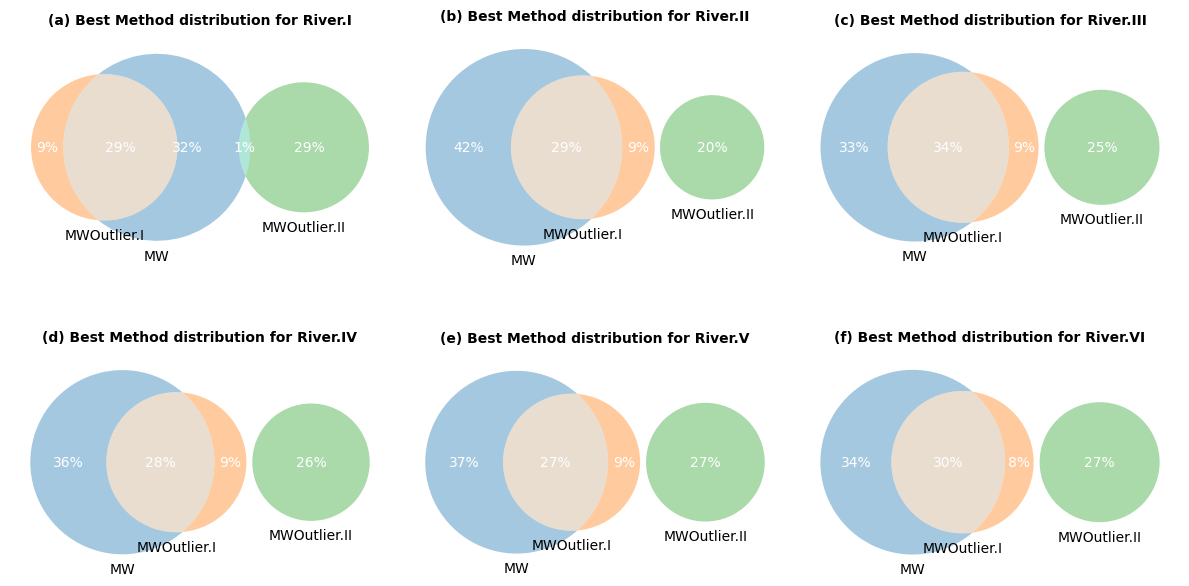

In [3]:
df = df2
# Figure 1: Best Method distribution for each river
unique_rivers = sorted(df['rivers'].unique())

# Prepare color palette
color_palette = [mcolors.TABLEAU_COLORS[key] for key in mcolors.TABLEAU_COLORS.keys()]

# Initialize subplot
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

# Assign subplot titles
titles = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Flatten axes for easier iteration
axes = axes.flatten()

# For each unique river
for i, river in enumerate(unique_rivers):
    # Subset dataframe to only include rows with this river
    river_df = df[df['rivers'] == river]

    # Total number of rows for this river
    total = len(river_df)

    # Find the counts of each method
    method_counts = river_df['bestMethod'].value_counts()

    # Prepare a dictionary to store the counts of each combination
    counts = {'100': 0, '010': 0, '001': 0, '110': 0, '101': 0, '011': 0, '111': 0}

    # Add the counts to the appropriate combination
    for method, count in method_counts.items():
        if method == 'MW':
            counts['100'] += count
        elif method == 'MWOutlier.I':
            counts['010'] += count
        elif method == 'MWOutlier.II':
            counts['001'] += count
        elif method == 'MW and MWOutlier.I':
            counts['110'] += count
        elif method == 'MW and MWOutlier.II':
            counts['101'] += count
        elif method == 'MWOutlier.I and MWOutlier.II':
            counts['011'] += count
        elif method == 'MW and MWOutlier.I and MWOutlier.II':
            counts['111'] += count

    # Convert counts to percentages and round
    counts = {key: round((value / total) * 100) for key, value in counts.items()}

    # Create the venn diagram
    venn = venn3(subsets=counts, set_labels=('MW', 'MWOutlier.I', 'MWOutlier.II'), ax=axes[i], 
                  subset_label_formatter=lambda x: f'{x}%', set_colors=color_palette[:3])

    # Change color and alpha
    for text in venn.set_labels:
        text.set_fontsize(10)  # Reduce fontsize here to make circles smaller
    for subset in venn.subset_labels:
        if subset is not None:
            subset.set_fontsize(10)  # Reduce fontsize here to make circles smaller
            subset.set_color('white')

    # Set title for this subplot
    axes[i].set_title(f"{titles[i]} Best Method distribution for {river}", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

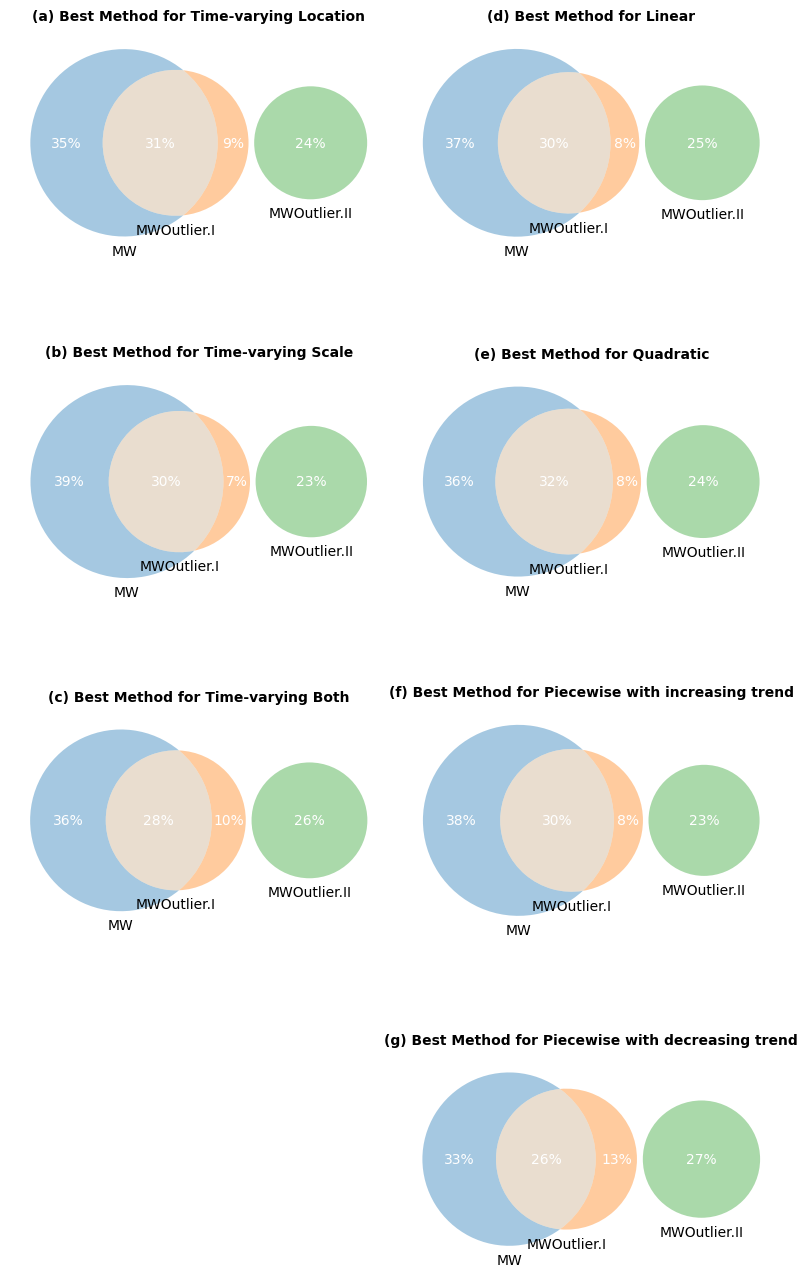

In [3]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
# Figure 1: Best Method distribution for each experiment

df=df2

# Figure 1: Best Method distribution for each experiment

def update_function(fname):
    if "LinearLinear" in fname:
        return "Linear"
    elif "PowerPower" in fname:
        return "Quadratic"
    elif "PartialPartial" in fname:
        return "Piecewise.I"
    elif "Partial1Partial1" in fname:
        return "Piecewise.II"
    else:
        return None  # return None or some default value for rows that don't match any condition

# Apply the function to the 'fname' column to update 'Function'
df['Function'] = df['fname'].apply(update_function)

unique_experiments = sorted(df['experiment'].unique())
experimentss = ["Time-varying Location","Time-varying Scale","Time-varying Both"]
functionsss = ['Linear', 'Quadratic', 'Piecewise with increasing trend', 'Piecewise with decreasing trend']
# Prepare color palette
color_palette = [mcolors.TABLEAU_COLORS[key] for key in mcolors.TABLEAU_COLORS.keys()]

# Initialize subplot
fig, axes = plt.subplots(4, 2, figsize=(8, 14))

# Assign subplot titles
titles = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)']

# Flatten axes for easier iteration
axes = axes.flatten()

# For each unique experiment
for i, experiment in enumerate(unique_experiments):
    # Subset dataframe to only include rows with this experiment
    experiment_df = df[df['experiment'] == experiment]

    # Total number of rows for this experiment
    total = len(experiment_df)

    # Find the counts of each method
    method_counts = experiment_df['bestMethod'].value_counts()

    # Prepare a dictionary to store the counts of each combination
    counts = {'100': 0, '010': 0, '001': 0, '110': 0, '101': 0, '011': 0, '111': 0}

    # Add the counts to the appropriate combination
    for method, count in method_counts.items():
        if method == 'MW':
            counts['100'] += count
        elif method == 'MWOutlier.I':
            counts['010'] += count
        elif method == 'MWOutlier.II':
            counts['001'] += count
        elif method == 'MW and MWOutlier.I':
            counts['110'] += count
        elif method == 'MW and MWOutlier.II':
            counts['101'] += count
        elif method == 'MWOutlier.I and MWOutlier.II':
            counts['011'] += count
        elif method == 'MW and MWOutlier.I and MWOutlier.II':
            counts['111'] += count

    # Convert counts to percentages and round
    counts = {key: round((value / total) * 100) for key, value in counts.items()}

    # Create the venn diagram
    # Set title for this subplot
    if i==0:
        j=0
    elif i==1:
        j=2
    elif i==2:
        j=4
    venn = venn3(subsets=counts, set_labels=('MW', 'MWOutlier.I', 'MWOutlier.II'), ax=axes[j], 
                  subset_label_formatter=lambda x: f'{x}%', set_colors=color_palette[:3])

    # Change color and alpha
    for text in venn.set_labels:
        text.set_fontsize(10)  # Reduce fontsize here to make circles smaller
    for subset in venn.subset_labels:
        if subset is not None:
            subset.set_fontsize(10)  # Reduce fontsize here to make circles smaller
            subset.set_color('white')

    
    axes[j].set_title(f"{titles[i]} Best Method for {experimentss[i]}", fontsize=10, fontweight='bold')

# Figure 2: Best Method distribution for each function
unique_functions = ['Linear', 'Quadratic', 'Piecewise.I', 'Piecewise.II']
# Remove the empty subplot (4,1)
fig.delaxes(axes[6])


# For each unique function
for i, function in enumerate(unique_functions):
    # Subset dataframe to only include rows with this function
    function_df = df[df['Function'] == function]

    # Total number of rows for this function
    total = len(function_df)

    # Find the counts of each method
    method_counts = function_df['bestMethod'].value_counts()

    # Prepare a dictionary to store the counts of each combination
    counts = {'100': 0, '010': 0, '001': 0, '110': 0, '101': 0, '011': 0, '111': 0}

    # Add the counts to the appropriate combination
    for method, count in method_counts.items():
        if method == 'MW':
            counts['100'] += count
        elif method == 'MWOutlier.I':
            counts['010'] += count
        elif method == 'MWOutlier.II':
            counts['001'] += count
        elif method == 'MW and MWOutlier.I':
            counts['110'] += count
        elif method == 'MW and MWOutlier.II':
            counts['101'] += count
        elif method == 'MWOutlier.I and MWOutlier.II':
            counts['011'] += count
        elif method == 'MW and MWOutlier.I and MWOutlier.II':
            counts['111'] += count  

    # Convert counts to percentages and round
    counts = {key: round((value / total) * 100) for key, value in counts.items()}

    # Create the venn diagram
    # Set title for this subplot
    if i==0:
        j=1
    elif i==1:
        j=3
    elif i==2:
        j=5
    elif i==3:
        j=7
    venn = venn3(subsets=counts, set_labels=('MW', 'MWOutlier.I', 'MWOutlier.II'), ax=axes[j], 
                  subset_label_formatter=lambda x: f'{x}%', set_colors=color_palette[:3])

    # Change color and alpha
    for text in venn.set_labels:
        text.set_fontsize(10)  # Reduce fontsize here to make circles smaller
    for subset in venn.subset_labels:
        if subset is not None:
            subset.set_fontsize(10)  # Reduce fontsize here to make circles smaller
            subset.set_color('white')

    
    axes[j].set_title(f"{titles[i+3]} Best Method for {functionsss[i]}", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
# Figure 3, Percentage of the Best Metho for each river
df=df2

# Figure 1: Best Method distribution for each experiment

def update_function(fname):
    if "LinearLinear" in fname:
        return "Linear"
    elif "PowerPower" in fname:
        return "Quadratic"
    elif "PartialPartial" in fname:
        return "Piecewise.I"
    elif "Partial1Partial1" in fname:
        return "Piecewise.II"
    else:
        return None  # return None or some default value for rows that don't match any condition

# Apply the function to the 'fname' column to update 'Function'
df['Function'] = df['fname'].apply(update_function)
print(df)

functionsss = ['Linear', 'Quadratic', 'Piecewise without decreasing trend', 'Piecewise with decreasing trend']
year_ranges = ["1879-1913", "1914-1947", "1948-1981", "1982-2015"]
typenames = ['MW', 'MWOutlier.I', 'MWOutlier.II']


                                                   fname        experiment  \
0      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
1      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
2      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
3      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
4      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
...                                                  ...               ...   
63426  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63427  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63428  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63429  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63430  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   

        Function      location        scale     shape    rivers

/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_2201/1285980539.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'slope': slope, 'TypeExp': 'MW', 'TimePeriods': time_period}, ignore_index=True)
/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_2201/1285980539.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.II', 'TimePeriods': time_period}, ignore_index=True)
/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_2201/1285980539.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.II', 'TimePeriods': time_period}, ignore_index=True)
/var/folders/w

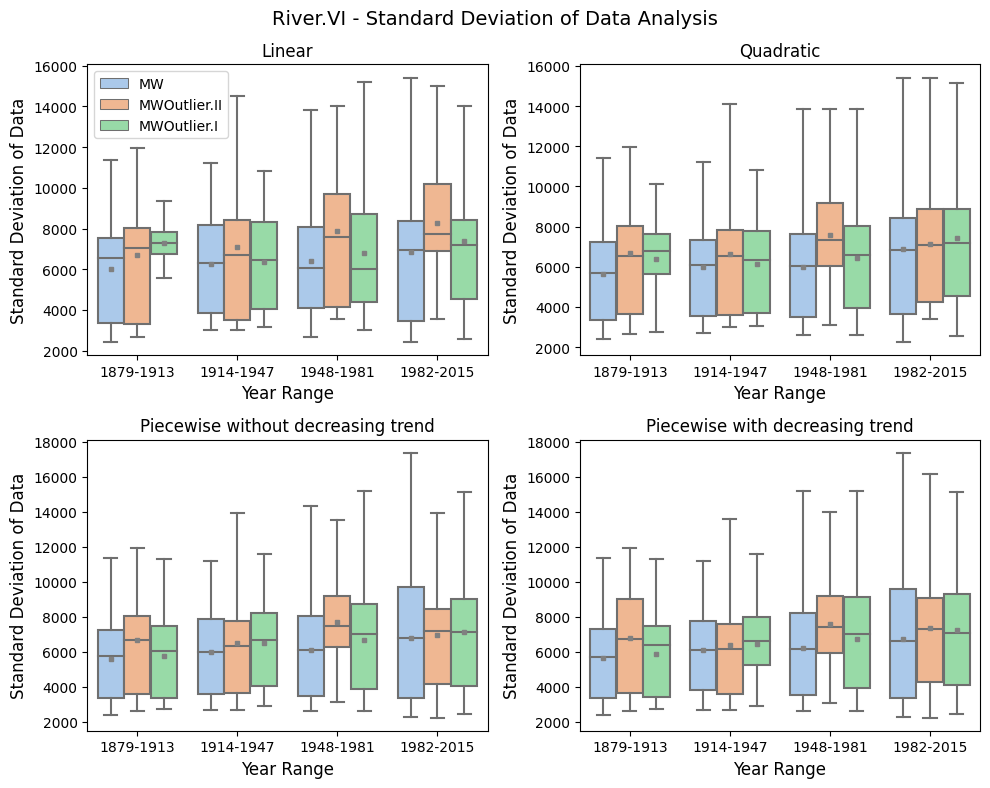

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


functionsss = ['Linear', 'Quadratic', 'Piecewise without decreasing trend', 'Piecewise with decreasing trend']
year_ranges = ["1879-1913", "1914-1947", "1948-1981", "1982-2015"]
typenames = ['MW', 'MWOutlier.I', 'MWOutlier.II']


currentriver = 'River.VI'

# Create a new dataframe with 3 columns
df_new = pd.DataFrame(columns=['slope', 'TypeExp', 'TimePeriods'])
# 
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)
axes = axes.flatten()

# Loop over each function
functions = ['Linear', 'Quadratic','Piecewise.I', 'Piecewise.II']
for i, function in enumerate(functions):
    # Subset the data for the current function
    subset_df = df[(df['rivers'] == currentriver) & (df['Function'] == function)]
    
    # Loop over the rows in the subset dataframe and add the values to the new dataframe
    for _, row in subset_df.iterrows():
        year = row['year']
        # slope = row['SlopeData']
        slope = row['StdData']

        best_method = row['bestMethod']
        for j in range(0, 4):
            if year in range(int(year_ranges[j].split('-')[0]), int(year_ranges[j].split('-')[1])+1):
                time_period = year_ranges[j]
                if best_method == 'MWOutlier.I':
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.I', 'TimePeriods': time_period}, ignore_index=True)
                elif best_method == 'MW':
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MW', 'TimePeriods': time_period}, ignore_index=True)
                elif best_method == 'MW and MWOutlier.I':
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MW', 'TimePeriods': time_period}, ignore_index=True)
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.I', 'TimePeriods': time_period}, ignore_index=True)
                elif best_method == 'MWOutlier.I and MWOutlier.II':
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.I', 'TimePeriods': time_period}, ignore_index=True)
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.II', 'TimePeriods': time_period}, ignore_index=True)
                elif best_method == 'MWOutlier.II':
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.II', 'TimePeriods': time_period}, ignore_index=True)
                elif best_method == 'MW and MWOutlier.II':
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MW', 'TimePeriods': time_period}, ignore_index=True)
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.II', 'TimePeriods': time_period}, ignore_index=True)
                elif best_method == 'MW and MWOutlier.I and MWOutlier.II':
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MW', 'TimePeriods': time_period}, ignore_index=True)
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.II', 'TimePeriods': time_period}, ignore_index=True)
                    df_new = df_new.append({'slope': slope, 'TypeExp': 'MWOutlier.I', 'TimePeriods': time_period}, ignore_index=True)

    # Create a grouped boxplot for the current function
    ax = axes[i]
    sns.boxplot(x=df_new['TimePeriods'], y=df_new['slope'], hue=df_new['TypeExp'], showfliers=False, showmeans=True,
                meanprops={"marker": "s", "markerfacecolor": "grey", "markeredgecolor": "grey", "markersize": "3"},
                ax=ax, palette='pastel')
    
    ax.set_xlabel('Year Range', fontsize=12)
    ax.set_ylabel('Standard Deviation of Data', fontsize=12)
    ax.set_title(f'{functionsss[i]}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticklabels(year_ranges, rotation=0)
    ax.legend(title=None, loc='best', fontsize=10)

    if i == 0:
        ax.legend(title=None, loc='best', fontsize=10)
    else:
        ax.get_legend().remove()

fig.suptitle(currentriver + ' - Standard Deviation of Data Analysis', fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_2201/3932284488.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['slopeB'] = subset_df.apply(lambda row: float(row['fname'].split("_")[-2]) if row['experiment'] != 'ChangingLocationScale' else -3, axis=1)
/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_2201/3932284488.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['slopeB'] = subset_df.apply(lambda row: float(row['fname'].split("_")[-2]) if row['experiment'] 

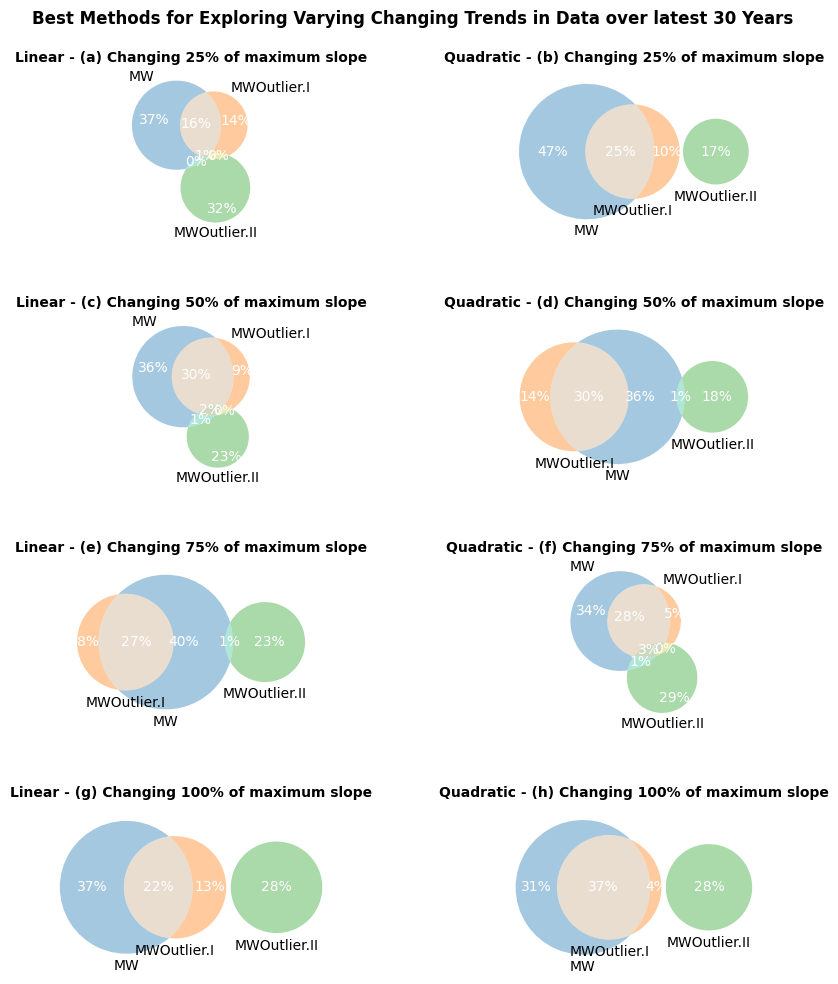

In [8]:
# Figure 4, Percentage of the Best Metho for each river
df=df2
# print(df)
# Figure 1: Best Method distribution for each experiment

def update_function(fname):
    if "LinearLinear" in fname:
        return "Linear"
    elif "PowerPower" in fname:
        return "Quadratic"
    elif "PartialPartial" in fname:
        return "Piecewise.I"
    elif "Partial1Partial1" in fname:
        return "Piecewise.II"
    else:
        return None  # return None or some default value for rows that don't match any condition

# Apply the function to the 'fname' column to update 'Function'
df['Function'] = df['fname'].apply(update_function)

functionsss = ['Linear', 'Quadratic', 'Piecewise without decreasing trend', 'Piecewise with decreasing trend']
typenames = ['MW', 'MWOutlier.I', 'MWOutlier.II']

subset_df = df[(df['year'] > 1985) & (df['Function'] == 'Linear')]

subset_df['slopeB'] = subset_df.apply(lambda row: float(row['fname'].split("_")[-2]) if row['experiment'] != 'ChangingLocationScale' else -3, axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
subset_df = subset_df[subset_df['slopeB'].isin(valid_slopeB)]

df01=subset_df


subset_df = df[(df['year'] > 1985) & (df['Function'] == 'Quadratic')]

subset_df['slopeB'] = subset_df.apply(lambda row: float(row['fname'].split("_")[-2]) if row['experiment'] != 'ChangingLocationScale' else -3, axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
subset_df = subset_df[subset_df['slopeB'].isin(valid_slopeB)]

df02=subset_df

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib_venn import venn3

unique_slopes = sorted(df01['slopeB'].unique())

slopess = [
    "Changing 25% of maximum slope",
    "Changing 50% of maximum slope",
    "Changing 75% of maximum slope",
    "Changing 100% of maximum slope"
]

# Prepare color palette
color_palette = [mcolors.TABLEAU_COLORS[key] for key in mcolors.TABLEAU_COLORS.keys()]

# Initialize subplot
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4)
axes = axes.flatten()

titles = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
function_titles = ['Linear', 'Quadratic']

for i, experiment in enumerate(unique_slopes):
    # Subset dataframe to only include rows with this experiment
    experiment_df = df01[df01['slopeB'] == experiment]

    # Total number of rows for this experiment
    total = len(experiment_df)

    # Find the counts of each method
    method_counts = experiment_df['bestMethod'].value_counts()

    # Prepare a dictionary to store the counts of each combination
    counts = {'100': 0, '010': 0, '001': 0, '110': 0, '101': 0, '011': 0, '111': 0}

    # Add the counts to the appropriate combination
    for method, count in method_counts.items():
        if method == 'MW':
            counts['100'] += count
        elif method == 'MWOutlier.I':
            counts['010'] += count
        elif method == 'MWOutlier.II':
            counts['001'] += count
        elif method == 'MW and MWOutlier.I':
            counts['110'] += count
        elif method == 'MW and MWOutlier.II':
            counts['101'] += count
        elif method == 'MWOutlier.I and MWOutlier.II':
            counts['011'] += count
        elif method == 'MW and MWOutlier.I and MWOutlier.II':
            counts['111'] += count

    # Convert counts to percentages and round
    counts = {key: round((value / total) * 100) for key, value in counts.items()}

    # Create the venn diagram
    if i == 0:
        j = 0
        axes[j].set_title(f"{function_titles[0]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')
    elif i == 1:
        j = 2
        axes[j].set_title(f"{function_titles[0]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')
    elif i == 2:
        j = 4
        axes[j].set_title(f"{function_titles[0]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')
    elif i == 3:
        j = 6
        axes[j].set_title(f"{function_titles[0]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')

    venn = venn3(subsets=counts, set_labels=('MW', 'MWOutlier.I', 'MWOutlier.II'), ax=axes[j],
                 subset_label_formatter=lambda x: f'{x}%', set_colors=color_palette[:3])

    for text in venn.set_labels:
        text.set_fontsize(10)
    for subset in venn.subset_labels:
        if subset is not None:
            subset.set_fontsize(10)
            subset.set_color('white')

for i, function in enumerate(unique_slopes):
    # Subset dataframe to only include rows with this function
    function_df = df02[df02['slopeB'] == function]

    # Total number of rows for this function
    total = len(function_df)

    # Find the counts of each method
    method_counts = function_df['bestMethod'].value_counts()

    # Prepare a dictionary to store the counts of each combination
    counts = {'100': 0, '010': 0, '001': 0, '110': 0, '101': 0, '011': 0, '111': 0}

    # Add the counts to the appropriate combination
    for method, count in method_counts.items():
        if method == 'MW':
            counts['100'] += count
        elif method == 'MWOutlier.I':
            counts['010'] += count
        elif method == 'MWOutlier.II':
            counts['001'] += count
        elif method == 'MW and MWOutlier.I':
            counts['110'] += count
        elif method == 'MW and MWOutlier.II':
            counts['101'] += count
        elif method == 'MWOutlier.I and MWOutlier.II':
            counts['011'] += count
        elif method == 'MW and MWOutlier.I and MWOutlier.II':
            counts['111'] += count

    # Convert counts to percentages and round
    counts = {key: round((value / total) * 100) for key, value in counts.items()}

    # Create the venn diagram
    if i == 0:
        j = 1
        axes[j].set_title(f"{function_titles[1]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')
    elif i == 1:
        j = 3
        axes[j].set_title(f"{function_titles[1]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')
    elif i == 2:
        j = 5
        axes[j].set_title(f"{function_titles[1]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')
    elif i == 3:
        j = 7
        axes[j].set_title(f"{function_titles[1]} - {titles[j]} {slopess[i]}", fontsize=10, fontweight='bold')

    venn = venn3(subsets=counts, set_labels=('MW', 'MWOutlier.I', 'MWOutlier.II'), ax=axes[j],
                 subset_label_formatter=lambda x: f'{x}%', set_colors=color_palette[:3])

    for text in venn.set_labels:
        text.set_fontsize(10)
    for subset in venn.subset_labels:
        if subset is not None:
            subset.set_fontsize(10)
            subset.set_color('white')

fig.suptitle("Best Methods for Exploring Varying Changing Trends in Data over latest 30 Years", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.5)
plt.savefig(f'/Users/yjshen/Downloads/GEV_Figures/30yr-f04-ChangingRateBestMethod.png', dpi=300)
plt.show()


/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_18608/285496286.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_piecewise1 = df_new_piecewise1.append({'metrics': metrics, 'TypeExp': county, 'station': station}, ignore_index=True)
/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_18608/285496286.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_piecewise1 = df_new_piecewise1.append({'metrics': metrics, 'TypeExp': county, 'station': station}, ignore_index=True)
/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_18608/285496286.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_piecewise1 = df_new_piecewise1.append({'metrics': metrics, 'TypeExp': county, 'station': sta

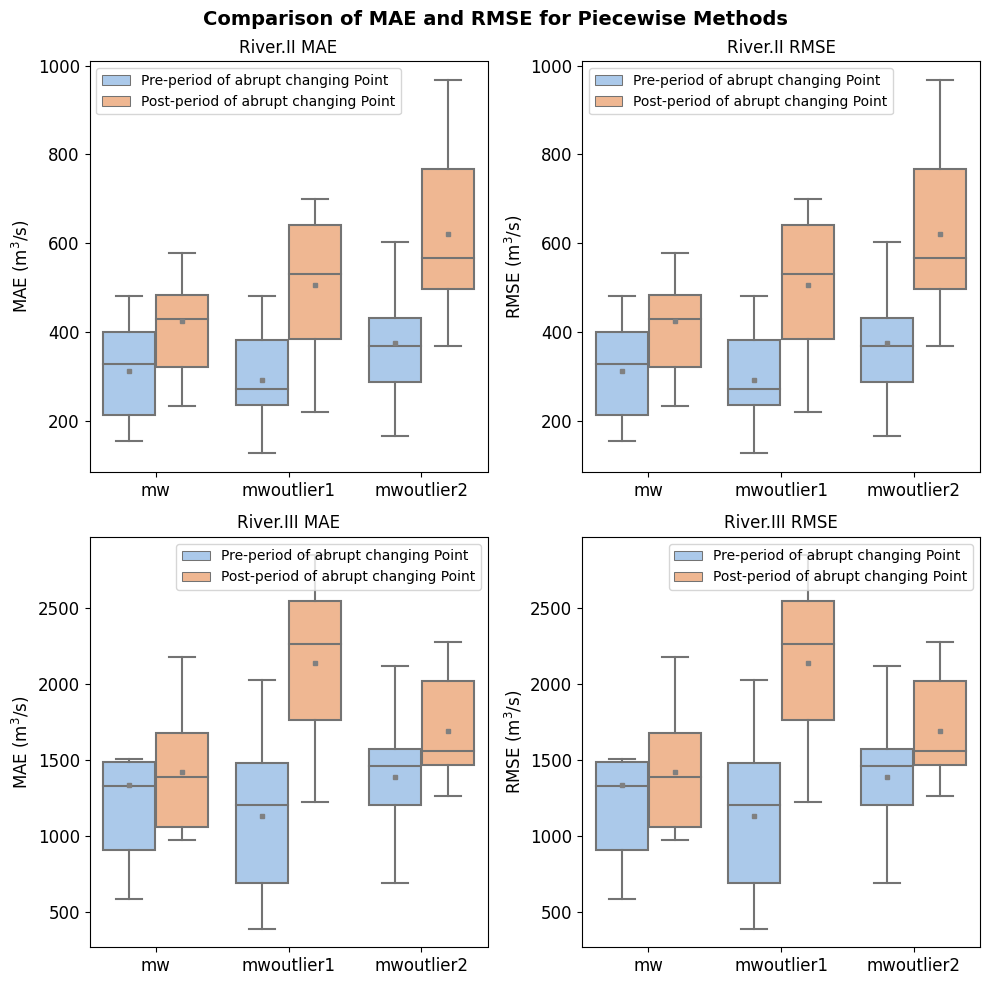

In [59]:
output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/RiverII_piecewise.csv"
piecewise1 = pd.read_csv(output_file)

output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/RiverIII_piecewise.csv"
piecewise2 = pd.read_csv(output_file)

import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data for piecewise1 and piecewise2
piecewise1_df = piecewise1[piecewise1['rivers'] == 'River.II']
piecewise2_df = piecewise2[piecewise2['rivers'] == 'River.III']

# Create a new dataframe for piecewise1 with 3 columns
df_new_piecewise1 = pd.DataFrame(columns=['metrics', 'TypeExp', 'station'])

# Loop over the rows in the piecewise1 dataframe and add the values to the new dataframe
for i, row in piecewise1_df.iterrows():
    for j in range(0, 3):
        for k in range(0, 2):
            station = f'{station_names[j]}'
            county = f'{Typenames[k]}'
            metrics = row[f'MAE_{station}_{county}']
            df_new_piecewise1 = df_new_piecewise1.append({'metrics': metrics, 'TypeExp': county, 'station': station}, ignore_index=True)

# Create a new dataframe for piecewise2 with 3 columns
df_new_piecewise2 = pd.DataFrame(columns=['metrics', 'TypeExp', 'station'])

# Loop over the rows in the piecewise2 dataframe and add the values to the new dataframe
for i, row in piecewise2_df.iterrows():
    for j in range(0, 3):
        for k in range(0, 2):
            station = f'{station_names[j]}'
            county = f'{Typenames[k]}'
            metrics = row[f'MAE_{station}_{county}']
            df_new_piecewise2 = df_new_piecewise2.append({'metrics': metrics, 'TypeExp': county, 'station': station}, ignore_index=True)

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Set the title for the figure
fig.suptitle('Comparison of MAE and RMSE for Piecewise Methods', fontsize=14, fontweight='bold')

# Create boxplots for piecewise1 MAE in the first subplot
sns.boxplot(x=df_new_piecewise1['station'], y=df_new_piecewise1['metrics'], hue=df_new_piecewise1['TypeExp'], showfliers=False, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "grey", "markeredgecolor": "grey", "markersize": "3"}, ax=axes[0, 0])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('MAE (m$^3$/s)', fontsize=12)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].legend(title=None, loc='best', fontsize=12)
axes[0, 0].set_title('River.II MAE', fontsize=12)

# Create boxplots for piecewise1 RMSE in the second subplot
sns.boxplot(x=df_new_piecewise1['station'], y=df_new_piecewise1['metrics'], hue=df_new_piecewise1['TypeExp'], showfliers=False, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "grey", "markeredgecolor": "grey", "markersize": "3"}, ax=axes[0, 1])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('RMSE (m$^3$/s)', fontsize=12)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].legend(title=None, loc='best', fontsize=12)
axes[0, 1].set_title('River.II RMSE', fontsize=12)

# Create boxplots for piecewise2 MAE in the third subplot with light colors
sns.boxplot(x=df_new_piecewise2['station'], y=df_new_piecewise2['metrics'], hue=df_new_piecewise2['TypeExp'], showfliers=False, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "grey", "markeredgecolor": "grey", "markersize": "3"}, ax=axes[1, 0])
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('MAE (m$^3$/s)', fontsize=12)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].legend(title=None, loc='best', fontsize=12)
axes[1, 0].set_title('River.III MAE', fontsize=12)

# Create boxplots for piecewise2 RMSE in the fourth subplot with light colors
sns.boxplot(x=df_new_piecewise2['station'], y=df_new_piecewise2['metrics'], hue=df_new_piecewise2['TypeExp'], showfliers=False, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "grey", "markeredgecolor": "grey", "markersize": "3"}, ax=axes[1, 1])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('RMSE (m$^3$/s)', fontsize=12)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].legend(title=None, loc='best', fontsize=12)
axes[1, 1].set_title('River.III RMSE', fontsize=12)


# Update the legend labels
legend_labels = ['Pre-period of abrupt changing Point', 'Post-period of abrupt changing Point']
for ax in axes.flatten():
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, legend_labels, title=None, loc='best', fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.savefig(f'/Users/yjshen/Downloads/Figures/Piecewise.png', dpi=300)
# Display the plot
plt.show()

In [81]:
output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/EvaluationResults_GEVMWmethods/Evaluation_exp1_linear.csv"
locationlinear = pd.read_csv(output_file)

output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/EvaluationResults_GEVMWmethods/Evaluation_exp2_linear.csv"
scalelinear = pd.read_csv(output_file)


output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/EvaluationResults_GEVMWmethods/Evaluation_exp3_linear.csv"
bothlinear = pd.read_csv(output_file)

# print(locationlinear)
locationlinear['slopeB'] = locationlinear.apply(lambda row: float(row['fname'].split("_")[-2]), axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
locationlinear = locationlinear[locationlinear['slopeB'].isin(valid_slopeB)]
locationlinear['rivers'] = locationlinear.apply(lambda row: float(row['fname'].split("_")[1]), axis=1)
# print(locationlinear)

# print(scalelinear)
scalelinear['slopeB'] = scalelinear.apply(lambda row: float(row['fname'].split("_")[-2]), axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
scalelinear = scalelinear[scalelinear['slopeB'].isin(valid_slopeB)]
scalelinear['rivers'] = scalelinear.apply(lambda row: float(row['fname'].split("_")[1]), axis=1)


bothlinear['slopeB'] = bothlinear.apply(lambda row: float(row['fname'].split("_")[-3]), axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
bothlinear = bothlinear[bothlinear['slopeB'].isin(valid_slopeB)]
bothlinear['rivers'] = bothlinear.apply(lambda row: float(row['fname'].split("_")[1]), axis=1)
# print(bothlinear)



output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/EvaluationResults_GEVMWmethods/Evaluation_exp1_power.csv"
locationpower = pd.read_csv(output_file)

output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/EvaluationResults_GEVMWmethods/Evaluation_exp2_power.csv"
scalepower = pd.read_csv(output_file)


output_file = "/Users/yjshen/Documents/00fish-mwork/Nicole_thesis/Flood-extreme/syntheticdataV2/EvaluationResults_GEVMWmethods/Evaluation_exp3_power.csv"
bothpower = pd.read_csv(output_file)


locationpower['slopeB'] = locationpower.apply(lambda row: float(row['fname'].split("_")[-2]), axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
locationpower = locationpower[locationpower['slopeB'].isin(valid_slopeB)]
locationpower['rivers'] = locationpower.apply(lambda row: float(row['fname'].split("_")[1]), axis=1)

scalepower['slopeB'] = scalepower.apply(lambda row: float(row['fname'].split("_")[-2]), axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
scalepower = scalepower[scalepower['slopeB'].isin(valid_slopeB)]
scalepower['rivers'] = scalepower.apply(lambda row: float(row['fname'].split("_")[1]), axis=1)


bothpower['slopeB'] = bothpower.apply(lambda row: float(row['fname'].split("_")[-3]), axis=1)
valid_slopeB = [0.25, 0.5, 0.75, 1]
bothpower = bothpower[bothpower['slopeB'].isin(valid_slopeB)]
bothpower['rivers'] = bothpower.apply(lambda row: float(row['fname'].split("_")[1]), axis=1)
# print(bothpower)



# Assuming you have three DataFrames named df1, df2, and df3
combined_df = pd.concat([locationlinear, scalelinear, bothlinear,locationpower,scalepower,bothpower], axis=0)

# axis=0 specifies that the concatenation should be done along the rows

# If the three DataFrames have the same columns, you can reset the index of the combined DataFrame
combined_df = combined_df.reset_index(drop=True)
print(combined_df)


     MAE_mwoutlier1  MAE_mwoutlier2   MAE_mw  RMSE_mwoutlier1  \
0           1095.79          709.72   680.21          1289.82   
1           1296.71         1243.87  1150.69          1547.95   
2            938.51          878.09   906.37          1140.44   
3           2493.34         2290.17  1695.89          2759.48   
4           1604.45         1620.71  1307.86          2014.37   
..              ...             ...      ...              ...   
247         1915.43         1801.30  2117.04          2235.78   
248         2101.77         1723.24  1699.14          2366.32   
249           12.34           19.31    10.74            14.67   
250           18.68           16.27    13.18            23.08   
251            9.16           10.64     8.91            10.00   

     RMSE_mwoutlier2  RMSE_mw  PBIASpercent_mwoutlier1  \
0             959.69   880.35                     -4.7   
1            1588.96  1412.64                     -3.5   
2            1118.86  1145.64                

/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_18608/511967675.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'MAE': maecurrent, 'TypeExp': 'MWOutlier.I', 'TimePeriods': slopedatas}, ignore_index=True)
/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_18608/511967675.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'MAE': maecurrent, 'TypeExp': 'MWOutlier.II', 'TimePeriods': slopedatas}, ignore_index=True)
/var/folders/w1/128wfjnd3476qsp0tblm0t740000gn/T/ipykernel_18608/511967675.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'MAE': maecurrent, 'TypeExp': 'MW', 'TimePeriods': slopedatas}, ignore_index=True)
/var/fold

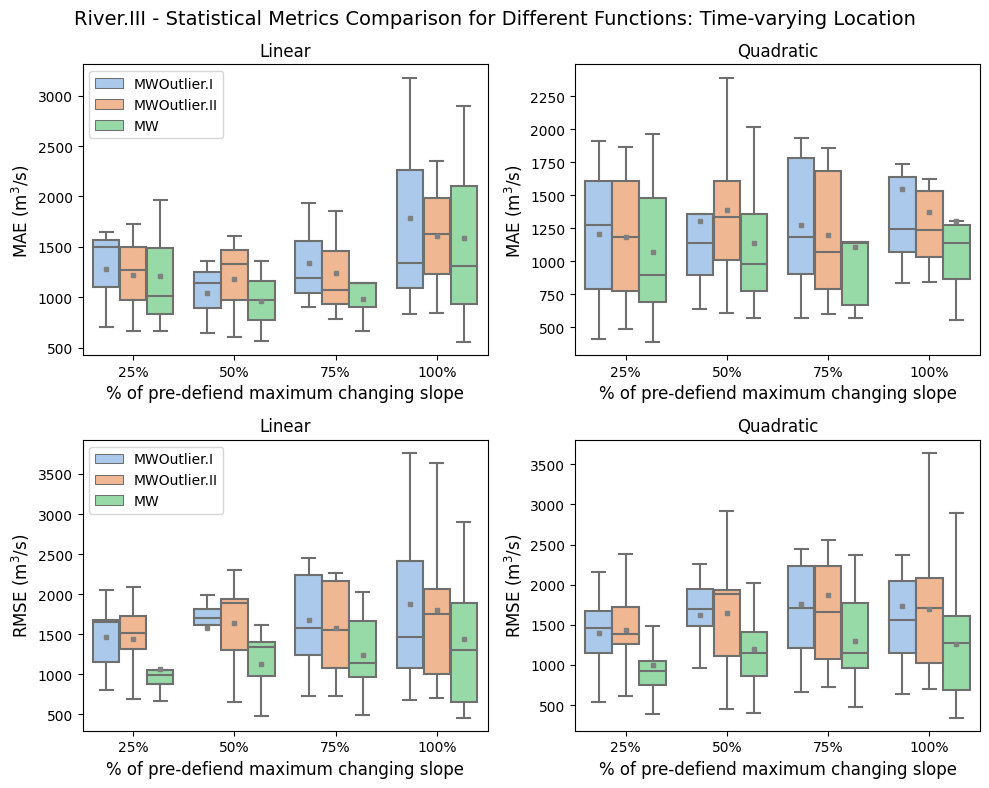

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns




experiments = ['ChangingLocation', 'ChangingScale', 'ChangingLocationScale']
currentriver = 4546 #1950




tionsss = ['Linear', 'Quadratic']
year_ranges = ["25%", "50%", "75%", "100%"]
typenames = ['MW', 'MWOutlier.I', 'MWOutlier.II']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)
axes = axes.flatten()

# Loop over each function
functions = ['Linear', 'Quadratic']

# Create a new dataframe with 3 columns
df_new = pd.DataFrame(columns=['MAE', 'TypeExp', 'TimePeriods'])
for i, function in enumerate(functions):
    # Subset the data for the current function
    subset_df = combined_df[(combined_df['rivers'] == currentriver) & (combined_df['functions'] == function) & (combined_df['experiment'] == 'ChangingLocation')]
    
    # Loop over the rows in the subset dataframe and add the values to the new dataframe
    for _, row in subset_df.iterrows():
        slopedatas = row['slopeB']
        for j in range(0, 3):
            if j == 0:
                maecurrent = row['MAE_mwoutlier1']
                df_new = df_new.append({'MAE': maecurrent, 'TypeExp': 'MWOutlier.I', 'TimePeriods': slopedatas}, ignore_index=True)
            elif j == 1:
                maecurrent = row['MAE_mwoutlier2']
                df_new = df_new.append({'MAE': maecurrent, 'TypeExp': 'MWOutlier.II', 'TimePeriods': slopedatas}, ignore_index=True)
            elif j == 2:
                maecurrent = row['MAE_mw']
                df_new = df_new.append({'MAE': maecurrent, 'TypeExp': 'MW', 'TimePeriods': slopedatas}, ignore_index=True)

    # Create a grouped boxplot for the current function
    ax = axes[i]
    sns.boxplot(x=df_new['TimePeriods'], y=df_new['MAE'], hue=df_new['TypeExp'], showfliers=False, showmeans=True,
                meanprops={"marker": "s", "markerfacecolor": "grey", "markeredgecolor": "grey", "markersize": "3"},
                ax=ax, palette='pastel')
    
    ax.set_xlabel('% of pre-defiend maximum changing slope', fontsize=12)
    ax.set_ylabel('MAE (m$^3$/s)', fontsize=12)
    ax.set_title(f'{functionsss[i]}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticklabels(year_ranges, rotation=0)
    ax.legend(title=None, loc='best', fontsize=10)

    if i == 0:
        ax.legend(title=None, loc='best', fontsize=10)
    else:
        ax.get_legend().remove()

# Create a new dataframe with 3 columns
df_new = pd.DataFrame(columns=['RMSE', 'TypeExp', 'TimePeriods'])
for i, function in enumerate(functions):
    # Subset the data for the current function
    subset_df = combined_df[(combined_df['rivers'] == currentriver) & (combined_df['functions'] == function)]
    
    # Loop over the rows in the subset dataframe and add the values to the new dataframe
    for _, row in subset_df.iterrows():
        slopedatas = row['slopeB']
        for j in range(0, 3):
            if j == 0:
                maecurrent = row['RMSE_mwoutlier1']
                df_new = df_new.append({'RMSE': maecurrent, 'TypeExp': 'MWOutlier.I', 'TimePeriods': slopedatas}, ignore_index=True)
            elif j == 1:
                maecurrent = row['RMSE_mwoutlier2']
                df_new = df_new.append({'RMSE': maecurrent, 'TypeExp': 'MWOutlier.II', 'TimePeriods': slopedatas}, ignore_index=True)
            elif j == 2:
                maecurrent = row['MAE_mw']
                df_new = df_new.append({'RMSE': maecurrent, 'TypeExp': 'MW', 'TimePeriods': slopedatas}, ignore_index=True)

    # Create a grouped boxplot for the current function
    ax = axes[i+2]
    sns.boxplot(x=df_new['TimePeriods'], y=df_new['RMSE'], hue=df_new['TypeExp'], showfliers=False, showmeans=True,
                meanprops={"marker": "s", "markerfacecolor": "grey", "markeredgecolor": "grey", "markersize": "3"},
                ax=ax, palette='pastel')
    
    ax.set_xlabel('% of pre-defiend maximum changing slope', fontsize=12)
    ax.set_ylabel('RMSE (m$^3$/s)', fontsize=12)
    ax.set_title(f'{functionsss[i]}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticklabels(year_ranges, rotation=0)
    ax.legend(title=None, loc='best', fontsize=10)

    if i == 0:
        ax.legend(title=None, loc='best', fontsize=10)
    else:
        ax.get_legend().remove()

fig.suptitle('River.III - Statistical Metrics Comparison for Different Functions: Time-varying Location', fontsize=14)
plt.tight_layout()
plt.savefig(f'/Users/yjshen/Downloads/Figures/RiverIII_TimevaryingLocation.png', dpi=300)
plt.show()

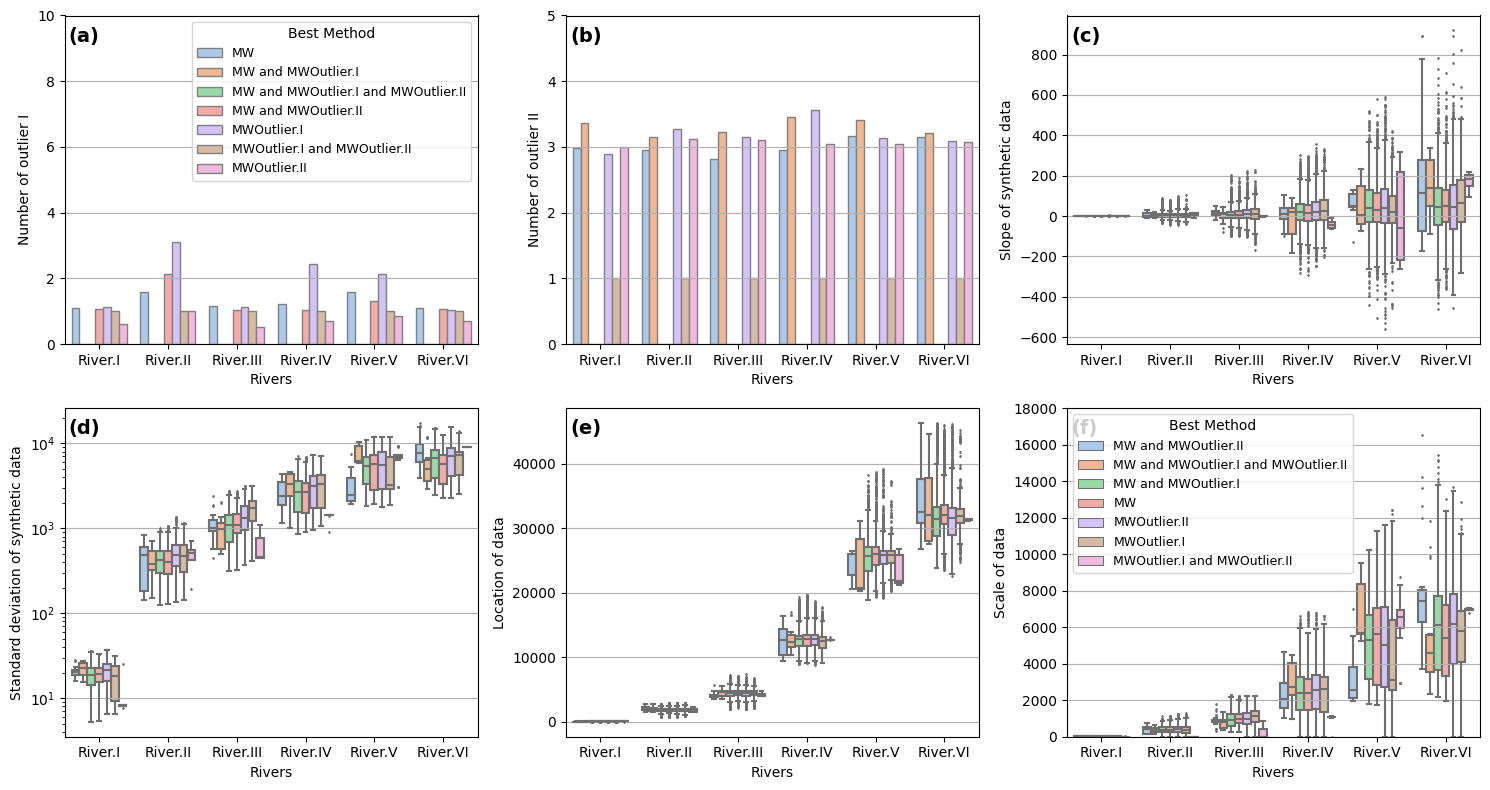

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the variables to plot
varsname = ['count_outlier1', 'count_outlier2', 'SlopeData', 'StdData', 'location', 'scale']
ylables = ['Number of outlier I', 'Number of outlier II', 'Slope of synthetic data', 'Standard deviation of synthetic data', 'Location of data', 'Scale of data']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Order of rivers for sorting
river_order = ['River.I', 'River.II', 'River.III', 'River.IV', 'River.V', 'River.VI']

# Iterate over variables and plot in subplots
for i, ax in enumerate(axes.flatten()):
    if i in [0, 1]:  # Use bar plot for subplots (a) and (b)
        # Get the mean values for each river and bestMethod combination
        mean_df = df2.groupby(['rivers', 'bestMethod'])[varsname[i]].mean().reset_index()
        
        # Convert 'rivers' column to ordered categorical variable
        mean_df['rivers'] = pd.Categorical(mean_df['rivers'], categories=river_order, ordered=True)
        
        # Bar plot
        sns.barplot(x='rivers', y=varsname[i], hue='bestMethod', data=mean_df, ax=ax, edgecolor='grey')
        if i == 0:  # Show legend for subplot (a)
            ax.legend(title='Best Method', fontsize=9)
            ax.set_ylim(0, 10)
        else:
            ax.get_legend().remove()  # Remove legend for subplot (b)
            ax.set_ylim(0, 5)
            
    else:  # Use box plot for other subplots
        # Melt the dataframe for the current variable
        melted_df = pd.melt(df2, id_vars=['rivers', 'bestMethod'], value_vars=[varsname[i]], var_name='Variable')
        
        # Convert 'rivers' column to ordered categorical variable
        melted_df['rivers'] = pd.Categorical(melted_df['rivers'], categories=river_order, ordered=True)
        
        # Box plot
        if varsname[i] == 'StdData':
            ax.set_yscale('log')  # Set y-axis to logarithmic scale for 'StdData'
        
        sns.boxplot(x='rivers', y='value', hue='bestMethod', data=melted_df, ax=ax, fliersize=1)  # Adjust fliersize as desired
        if i == 5:  # Show legend for subplot (c)
            ax.legend(title='Best Method', fontsize=9)
            ax.set_ylim(0, 18000)
        else:
            ax.get_legend().remove()  # Remove legend for other variables

    ax.set_xlabel('Rivers')
    ax.set_ylabel(ylables[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.yaxis.grid(True)

# Add subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes.flatten()):
    ax.text(0.01, 0.92, subplot_labels[i], transform=ax.transAxes, fontsize=14, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig(f'/Users/yjshen/Downloads/Figures/ExploreBestMethods.png', dpi=300)

# Display the plot
plt.show()


In [105]:
print(df2)

                                                   fname        experiment  \
0      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
1      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
2      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
3      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
4      ChangingLocation_LinearLinear_12966_1296.6_-0....  ChangingLocation   
...                                                  ...               ...   
63426  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63427  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63428  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63429  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   
63430  ChangingScale_PowerPower_76_7.6_-0.18556178746...     ChangingScale   

        Function      location        scale     shape    rivers